In [27]:
import shapely
import json
import fiona

# with open('golfclub.geojson', 'r') as f:
#     golf_club_geo = json.load(f)

with fiona.open('golfclub.geojson', 'r') as f:
    for feature in f:
        print(feature)

    # golf_club_geo = shapely.from_geojson(geo)
    # golf_club_geo = json.loads(geo)



# golf_club_geo

# golf_club_geo = shapely.from_geojson(golf_club_geo)

In [37]:
import fiona
from shapely.geometry import shape

def import_geojson(geojson_file):
    features = []
    with fiona.open(geojson_file, 'r') as src:
        for feature in src:
            # geom = shape(feature['geometry'])
            geom = shapely.from_geojson(feature['geometry'])
            properties = feature['properties']
            features.append({
                'geometry': geom,
                'properties': properties
            })
    return features

# Example usage
geojson_file = 'golfclub.geojson'
features = import_geojson(geojson_file)

# Print the imported features
for i, feature in enumerate(features):
    print(f"Feature {i+1}:")
    print(f"  Geometry: {feature['geometry']}")
    print(f"  Properties: {feature['properties']}")


GEOSException: ParseException: Error parsing JSON: '[json.exception.parse_error.101] parse error at line 1, column 1: syntax error while parsing value - invalid literal; last read: 'c''

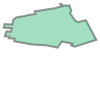

In [32]:
feature['geometry']

In [36]:
feature['geometry'].area

6.121824017103463e-05

In [65]:
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon

geo: dict = {'type': 'Polygon',
   'coordinates': [[[23.08437310100004, 53.15448536100007],
   [23.08459767900007, 53.15448536100007],
   [23.08594514600003, 53.153587050000056],
   [23.08437310100004, 53.15448536100007]]]}


polygon: Polygon = shape(geo)

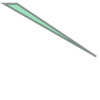

In [39]:
polygon

In [57]:
with open('golfclub.geojson', 'r') as f:
    golf_club_geo = json.load(f)

golf_club_geo['features'][0]['geometry']

{'coordinates': [[[-2.473365214092297, 53.78926620444841],
   [-2.474595132186124, 53.78931719266453],
   [-2.474724597248013, 53.78875631888093],
   [-2.4734515241343615, 53.78866708826962],
   [-2.473602566706944, 53.78811895320666],
   [-2.4742930470401348, 53.788195437599],
   [-2.474551977164708, 53.787392344525955],
   [-2.4738183418108406, 53.78734135397082],
   [-2.4739046518528767, 53.787086400263945],
   [-2.473019973925659, 53.78703540933694],
   [-2.4730631289463076, 53.78661473182231],
   [-2.4703227851241536, 53.78611756204893],
   [-2.4680139915098778, 53.78597733361164],
   [-2.46624463565621, 53.78562038638361],
   [-2.465597310343611, 53.786576488202655],
   [-2.463914264531212, 53.78624504203955],
   [-2.464108462125239, 53.7859645855485],
   [-2.4635690243646025, 53.7857606160139],
   [-2.4601597777191557, 53.786844192807536],
   [-2.461799668510963, 53.78992904642146],
   [-2.463029586604762, 53.78963586760955],
   [-2.4635042918332317, 53.789878058949],
   [-2.464

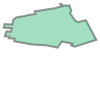

In [62]:
golfclub = shape(golf_club_geo['features'][0]['geometry'])
golfclub

In [63]:
golfclub.area

6.121824017103463e-05

In [67]:
import fiona
from shapely.geometry import shape
from shapely.ops import transform
from pyproj import Transformer

def calculate_area_in_hectares(geojson_file):
    areas_hectares = []
    with fiona.open(geojson_file, 'r') as src:
        # Define a transformer to convert from WGS84 to a projected coordinate system (e.g., UTM)
        transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
        
        for feature in src:
            geom = shape(feature['geometry'])
            if geom.is_valid:
                # Reproject the geometry to the projected coordinate system
                projected_geom = transform(transformer.transform, geom)
                # Calculate the area in square meters
                area_sqm = projected_geom.area
                # Convert square meters to hectares (1 hectare = 10,000 square meters)
                area_hectares = area_sqm / 10000
                areas_hectares.append(area_hectares)
    return areas_hectares

# Example usage
geojson_file = 'golfclub.geojson'
areas = calculate_area_in_hectares(geojson_file)

for i, area in enumerate(areas):
    print(f"Shape {i+1} area: {area:.2f} hectares")


Shape 1 area: 128.41 hectares


In [68]:
import geopandas as gpd

golfclub = gpd.read_file('golfclub.geojson')

golfclub

,geometry
0,"POLYGON ((-2.47337 53.78927, -2.47460 53.78932..."


In [93]:
golfclub = golfclub.to_crs(27700)
golfclub.area / 10000

0    44.874944
dtype: float64

In [94]:
golfclub.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [74]:
loughneagh_geo = gpd.read_file('Lough_Neagh_Network_Contribution.geojson')
loughneagh_geo = loughneagh_geo.to_crs(3857)
loughneagh_geo.area

0           74.731921
1           74.732686
2           74.731283
3          672.580288
4           74.729964
              ...    
2088409     73.875662
2088410     73.874622
2088411     73.875034
2088412    147.751118
2088413     73.875106
Length: 2088414, dtype: float64

In [75]:
loughneagh_geo.area / 1_000_000

0          0.000075
1          0.000075
2          0.000075
3          0.000673
4          0.000075
             ...   
2088409    0.000074
2088410    0.000074
2088411    0.000074
2088412    0.000148
2088413    0.000074
Length: 2088414, dtype: float64

In [92]:
col_geo = gpd.read_file('hollingworth_lake.geojson')
col_geo = col_geo.to_crs("+proj=cea +lat_0=53.631431 +lon_0=-2.097599 +units=m") #latlong for centre of lake
print(col_geo.area)
print(col_geo.area / 10_000)

0    448010.689124
dtype: float64
0    44.801069
dtype: float64


In [91]:
col_geo.area / 10_000

0    44.801069
dtype: float64

In [95]:
col_geo = gpd.read_file('hollingworth_lake.geojson')
col_geo = col_geo.to_crs(27700) #latlong for centre of lake
print(col_geo.area)
print(col_geo.area / 10_000)

0    447680.522512
dtype: float64
0    44.768052
dtype: float64
